# zadanie 3

Wczytywanie danych

In [2]:
data(stackloss)
head(stackloss)

Air.Flow,Water.Temp,Acid.Conc.,stack.loss
80,27,89,42
80,27,88,37
75,25,90,37
62,24,87,28
62,22,87,18
62,23,87,18


Wybór odpowiedniego modelu

In [6]:
model_entry <- lm(stack.loss ~ Water.Temp + Acid.Conc., data = stackloss)
summary(model_entry)

# zmienna Acid.Conc. ma p-value > 0.05, więc usuwamy ją z modelu


Call:
lm(formula = stack.loss ~ Water.Temp + Acid.Conc., data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8197 -2.8600 -0.6656  3.1235  8.3295 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -51.2361    18.5374  -2.764   0.0128 *  
Water.Temp    2.7320     0.3949   6.919 1.82e-06 ***
Acid.Conc.    0.1290     0.2329   0.554   0.5866    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.137 on 18 degrees of freedom
Multiple R-squared:  0.7704,	Adjusted R-squared:  0.7449 
F-statistic:  30.2 on 2 and 18 DF,  p-value: 1.772e-06


In [7]:
model_final <- lm(stack.loss ~ Water.Temp, data = stackloss)
summary(model_final)


Call:
lm(formula = stack.loss ~ Water.Temp, data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8904 -3.6206  0.3794  2.8398  8.4747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.9109     7.6056  -5.511 2.58e-05 ***
Water.Temp    2.8174     0.3567   7.898 2.03e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.043 on 19 degrees of freedom
Multiple R-squared:  0.7665,	Adjusted R-squared:  0.7542 
F-statistic: 62.37 on 1 and 19 DF,  p-value: 2.028e-07


ii) Czy któraś z obserwacji może być uznana za obserwację o dużej dźwigni?

integer(0)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


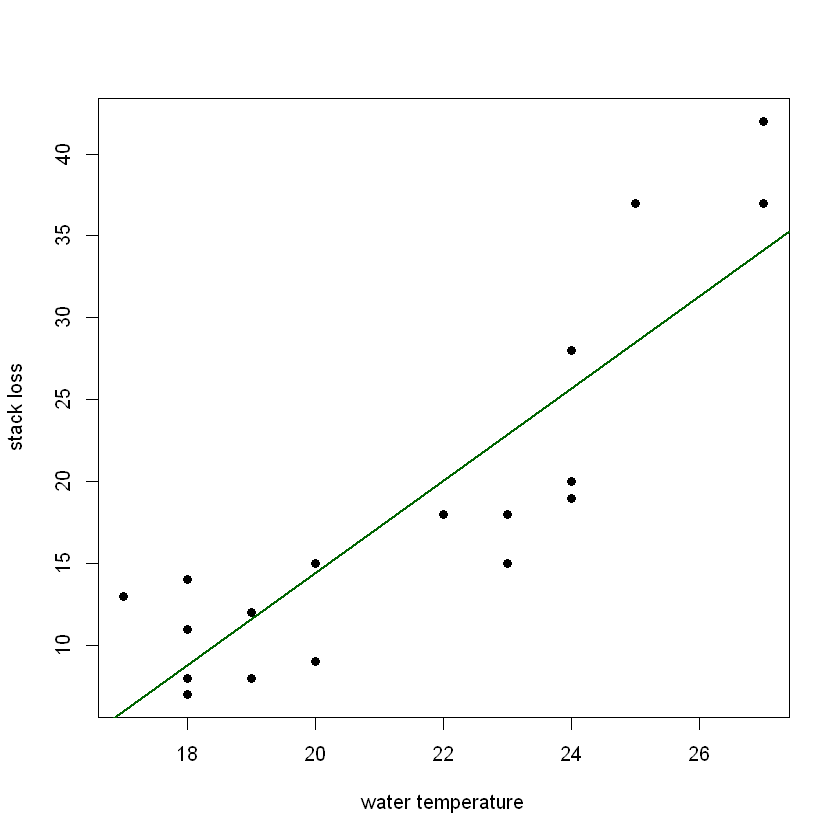

In [11]:
# obserwacja o dużej dźwigni to taka obserwacja, która ma typową wartość X ale nietypową wartość Y


# graficzne szukanie obserwacji o duże dźwigni
plot(stackloss$Water.Temp, stackloss$stack.loss, ylab = "stack loss", xlab = "water temperature", pch = 19)

# z patrzenia na wykres nie widać obserwacji o dużej dźwigni

In [14]:
# liczbowe szukanie obserwacji o dużej dźwignii (analiza reszt studentyzowanych)

reszty_stud = rstudent(model_final)
summary(reszty_stud)
print('__________________________________________________________________________________________________')
k = which(abs(reszty_stud) > 2)
k

# z analizy reszt studentyzowanych wynika, że nie ma obserwacji o dużej dźwignii

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.69706 -0.73530  0.07593  0.02370  0.62827  1.91791 

[1] "__________________________________________________________________________________________________"


named integer(0)

In [15]:
# liczbowe szukanie obserwacji o dużej dźwignii (outlier test)

install.packages("car")
library(car)
outlierTest(model_final)

# outlierTest() zwraca nam obserwacje 3, jednak z p-value > 0.05, więc nie bieżemy tej obserwacji pod uwagę
# czyli ten test mówi, że nie ma obserwacji o dużej dźwignii

Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependency 'lme4'




  There are binary versions available but the source versions are later:
     binary source needs_compilation
lme4 1.1-26 1.1-32              TRUE
car  3.0-10  3.1-1             FALSE



installing the source packages 'lme4', 'car'

Warning message in install.packages("car"):
"installation of package 'lme4' had non-zero exit status"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
  rstudent unadjusted p-value Bonferroni p
3 1.917911           0.071129           NA

In [18]:
# liczbowe szukanie obserwacji o dużej dźwignii (influence.measures())

influence.measures(model_final)

# według tej funkcji obserwacje 1 i 2 są wpływowe

Influence measures of
	 lm(formula = stack.loss ~ Water.Temp, data = stackloss) :

    dfb.1_ dfb.Wt.T   dffit cov.r   cook.d    hat inf
1  -0.8120  0.88850  1.0024 1.002 0.443616 0.2221   *
2  -0.2719  0.29756  0.3357 1.372 0.058208 0.2221   *
3  -0.4954  0.56604  0.7213 0.877 0.228024 0.1239    
4  -0.0840  0.10049  0.1466 1.195 0.011205 0.0898    
5   0.0135 -0.02713 -0.0964 1.153 0.004859 0.0517    
6   0.1057 -0.13991 -0.2663 1.070 0.035440 0.0658    
7   0.2579 -0.30853 -0.4500 0.986 0.095958 0.0898    
8   0.2161 -0.25850 -0.3771 1.050 0.069480 0.0898    
9   0.1787 -0.23659 -0.4503 0.886 0.092259 0.0658    
10  0.2842 -0.25073  0.3540 1.084 0.062041 0.0956    
11  0.2842 -0.25073  0.3540 1.084 0.062041 0.0956    
12  0.5280 -0.48072  0.6018 1.000 0.168744 0.1316    
13  0.1170 -0.10323  0.1457 1.205 0.011087 0.0956    
14  0.0140 -0.01167  0.0208 1.197 0.000228 0.0696    
15 -0.0426  0.03756 -0.0530 1.228 0.001482 0.0956    
16 -0.0959  0.08458 -0.1194 1.214 0.007469 0.0956    

Warning message in plot.window(...):
"'id.method' nie jest parametrem graficznym"Warning message in plot.window(...):
"'id.n' nie jest parametrem graficznym"Warning message in plot.window(...):
"'id.cex' nie jest parametrem graficznym"Warning message in plot.xy(xy, type, ...):
"'id.method' nie jest parametrem graficznym"Warning message in plot.xy(xy, type, ...):
"'id.n' nie jest parametrem graficznym"Warning message in plot.xy(xy, type, ...):
"'id.cex' nie jest parametrem graficznym"Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.method' nie jest parametrem graficznym"Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.n' nie jest parametrem graficznym"Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.cex' nie jest parametrem graficznym"Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.method' nie jest parametrem graficznym"Warning message in axis(side = side, at = at, labels = labels, ...):

StudRes,Hat,CookD
1.8759536,0.2221163,0.44361619
0.6282651,0.2221163,0.05820793
1.9179109,0.1239276,0.22802446


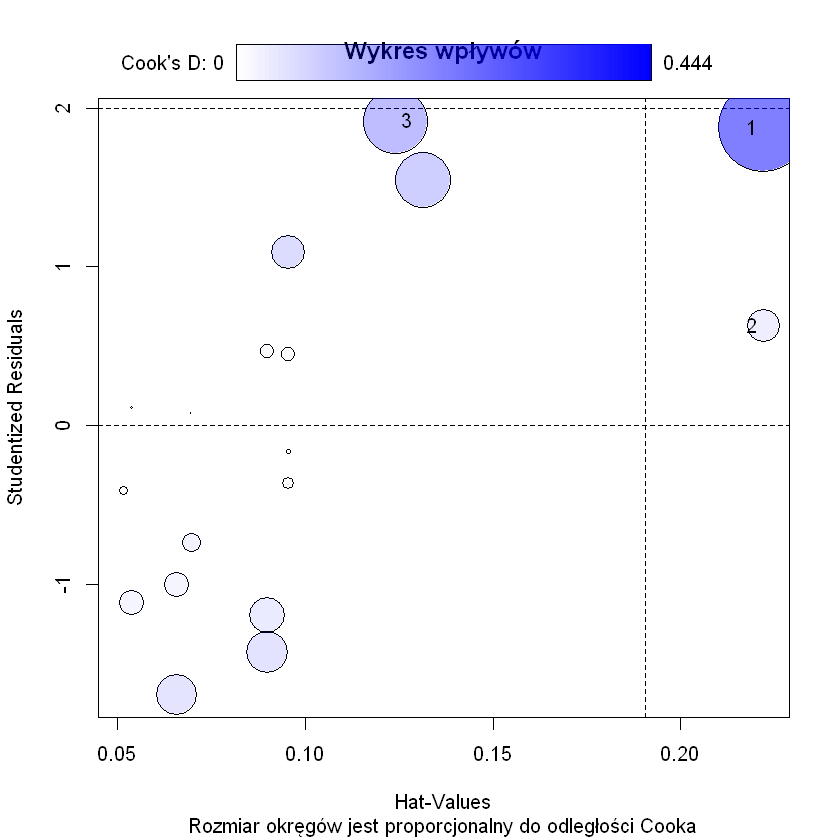

In [17]:
# liczbowe szukanie obserwacji o dużej dźwignii (influencePlot())

influencePlot (model_final, id.method = "identify", id.n = 1, id.cex = 1 , main = "Wykres wpływów",
               sub = "Rozmiar okręgów jest proporcjonalny do odległości Cooka")

# według tej metody, obserwacje 1 i 3 są wpływowe
# mają duże odległości Cook'a
# ich moduły reszt studentyzowanych są bliskie 2

iii) Jeśli tak, przedstaw na wykresie prostą regresji dopasowaną do wszystkich obserwacji oraz prostą dopasowaną po usunięciu tego punktu.


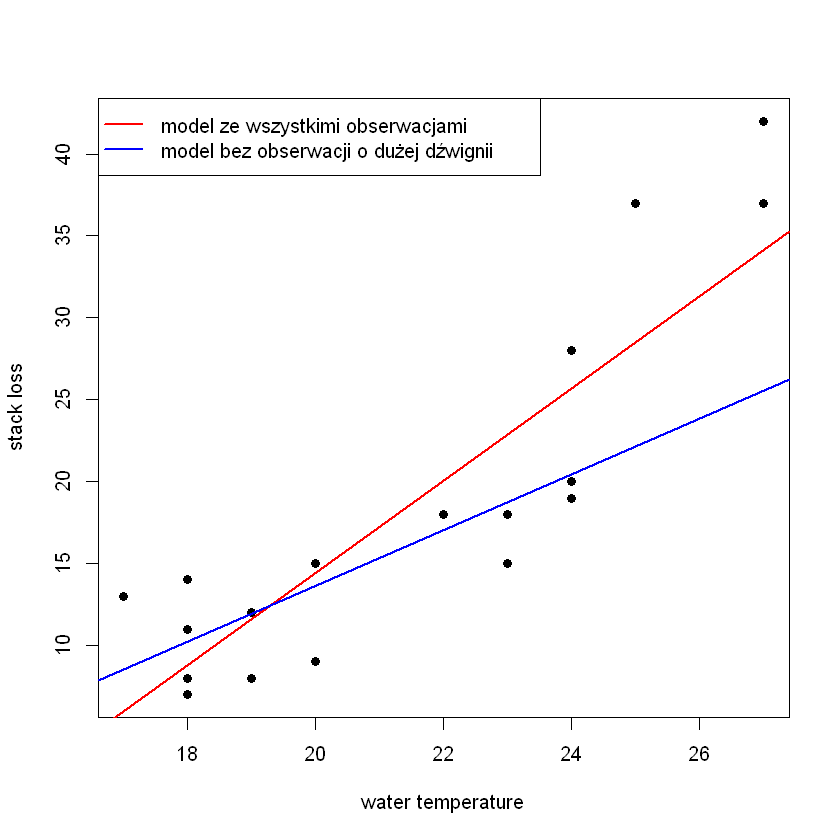

In [25]:
model_no_outliers <- lm(stack.loss[-c(1,2,3)] ~ Water.Temp[-c(1,2,3)], data = stackloss)

plot(stackloss$Water.Temp, stackloss$stack.loss, ylab = "stack loss", xlab = "water temperature", pch = 19)
abline(model_final, col = "red", lwd = 2)
abline(model_no_outliers, col = "blue", lwd = 2)
legend('topleft', c('model ze wszystkimi obserwacjami', 'model bez obserwacji o dużej dźwignii'), col = c('red', 'blue'), lty = c(1, 1, 1, NA), pch = c(NA, NA, NA, 19), lwd = c(2, 2, 2, NA))

iv) Przedstaw podsumowania obu modeli. Czy usunięcie punktu o dużej
dźwigni spowodowało zmianę w dopasowaniu modelu? Podaj dokładność
dopasowania dla obu modeli.

In [27]:
print('model ze wszystkimi zmiennymi')
summary(model_final)
print('_________________________________________________________________________________________________________')
print('model bez zmiennych o dużej dźwignii')
summary(model_no_outliers)

# jak widać dopasowanie modelu do danych pogorszyło się po usunięciu obserwacji
# Adjusted R2 jest wyższy w pełnym modelu
# natomiast bład standardowy reszt jest mniejszy (lepszy) w modelu z usuniętymi obserwacjami

[1] "model ze wszystkimi zmiennymi"



Call:
lm(formula = stack.loss ~ Water.Temp, data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8904 -3.6206  0.3794  2.8398  8.4747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.9109     7.6056  -5.511 2.58e-05 ***
Water.Temp    2.8174     0.3567   7.898 2.03e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.043 on 19 degrees of freedom
Multiple R-squared:  0.7665,	Adjusted R-squared:  0.7542 
F-statistic: 62.37 on 1 and 19 DF,  p-value: 2.028e-07


[1] "_________________________________________________________________________________________________________"
[1] "model bez zmiennych o dużej dźwignii"



Call:
lm(formula = stack.loss[-c(1, 2, 3)] ~ Water.Temp[-c(1, 2, 3)], 
    data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6220 -2.9698 -0.1736  1.3780  7.5736 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -20.4000     7.0763  -2.883 0.010819 *  
Water.Temp[-c(1, 2, 3)]   1.7011     0.3475   4.895 0.000162 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.495 on 16 degrees of freedom
Multiple R-squared:  0.5996,	Adjusted R-squared:  0.5745 
F-statistic: 23.96 on 1 and 16 DF,  p-value: 0.000162


v) Dla modelu dopasowanego do pełnego zbioru danych wyznacz reszty
studentyzowane
vi) Wyznacz obserwacje odstające korzystając z wektora reszt studentyzowanych.
vii) Wyznacz obserwacje odstające korzystając z testu outlierTest.
viii) Przedstaw i skomentuj wykres wpływów, zaznacz 3 obserwacje o
największych odległościach Cooka.
ix) Zdecyduj które z zaznaczonych obserwacji są obserwacjami wpływowymi.
x) Zweryfikuj dokonany wybór za pomocą testu influence.measures
xi) Usuń obserwacje wpływowe i ponownie dopasuj model.

Zrobione powyżej.

# Zadanie 4

Wczytywanie danych

In [36]:
library(data.table)
react <- fread('http://theta.edu.pl/wp-content/uploads/2018/03/DANE_predkosc_reakcji.txt')
head(react)

V1,V2
15,5.2541984
30,6.7132842
30,11.2666779
4,0.6183255
26,1.7986432
21,6.1584493


i) Przedstaw na wykresie punktowym zależność pomiędzy zmienną Predkosc
i zmienną Koncentracja. Czy zależność ma charakter liniowy?

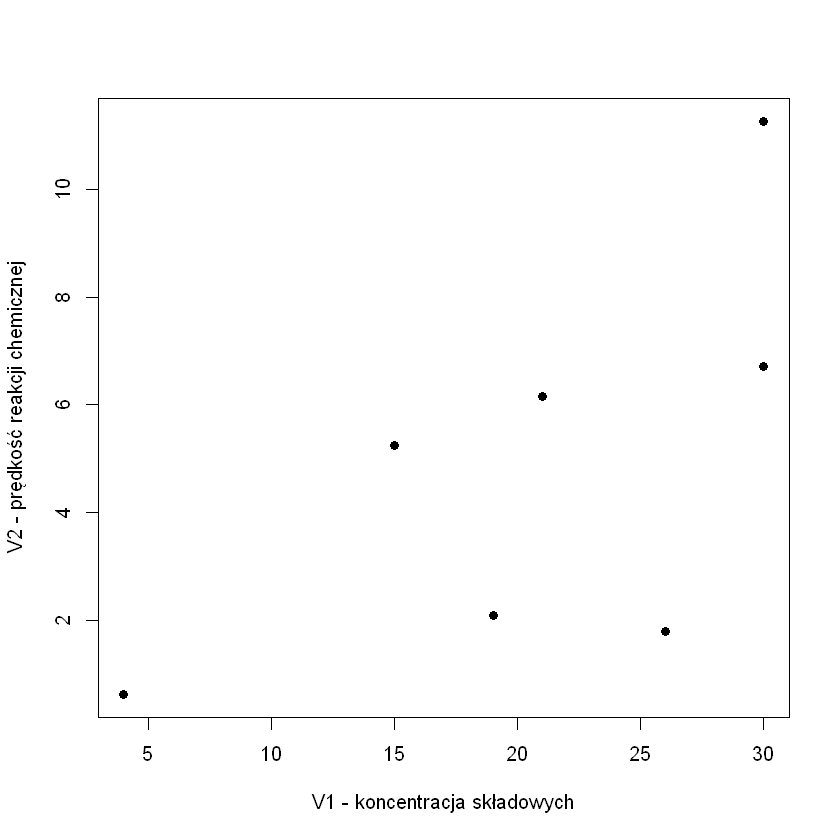

In [37]:
plot(react$V1, react$V2, ylab = "V2 - prędkość reakcji chemicznej", xlab = "V1 - koncentracja składowych", pch = 19)

# zależność nie ma charakteru liniowego

ii) Zastosuj transformację logarytmiczną dla zmiennej Predkosc, dla obu
zmiennych Predkosc i Koncentracja oraz tylko dla zmiennej Koncentracja.
Czy któraś z transformacji prowadzi do uzyskania liniowego charakteru zależności? Przedstaw odpowiednie wykresy punktowe danych. Przedstaw
wykresy reszt dla tych trzech modeli. Czy można zauważyć jakiś trend w
układzie reszt czy też układają się one w sposób losowy? Co to oznacza dla
dopasowanego modelu?

NULL

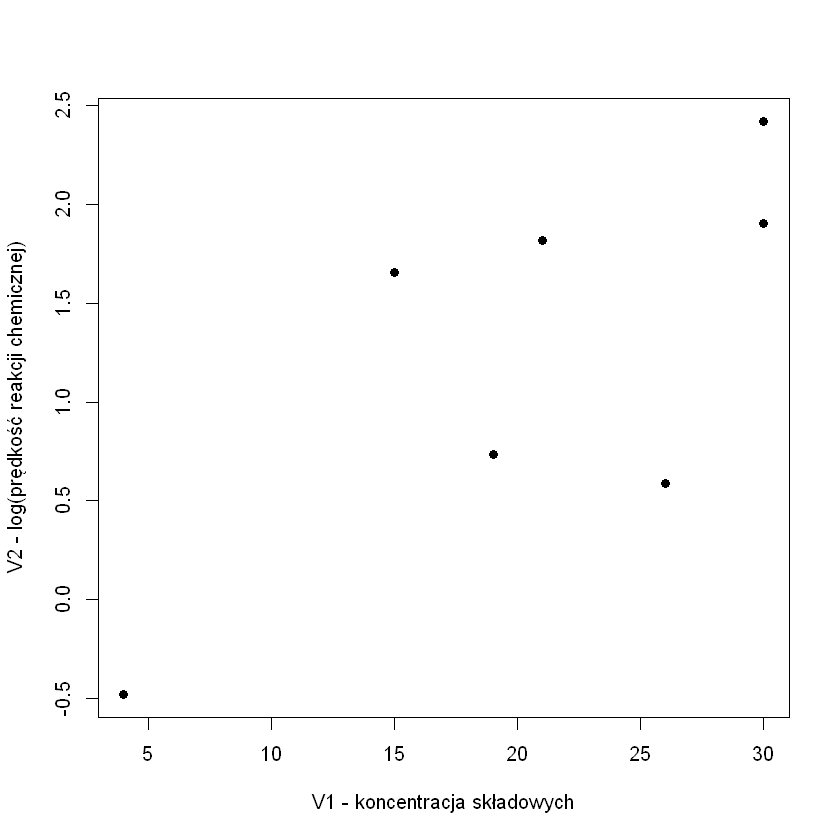

In [40]:
predkosc_log <- plot(react$V1, log(react$V2), ylab = "V2 - log(prędkość reakcji chemicznej)", xlab = "V1 - koncentracja składowych", pch = 19)

predkosc_log

# zlogarytmowanie zmiennej 'prędkość' robi nam zależnoś liniową

NULL

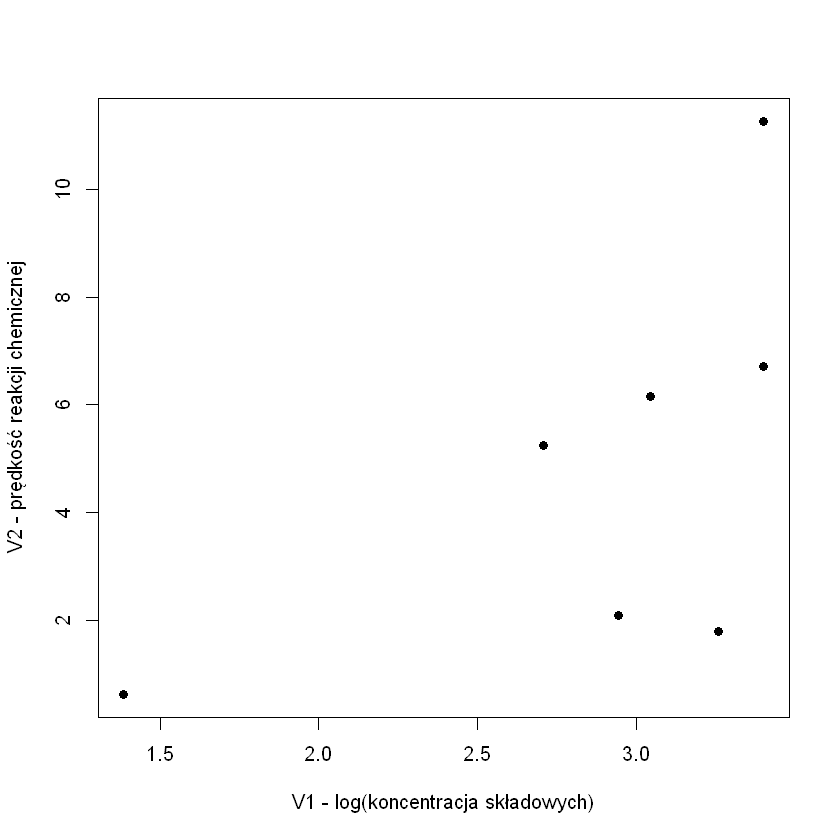

In [41]:
koncentracja_log <- plot(log(react$V1), react$V2, ylab = "V2 - prędkość reakcji chemicznej", xlab = "V1 - log(koncentracja składowych)", pch = 19)

koncentracja_log

# zlogarytmowanie zmiennej 'prędkość' nie robi nam zależności liniowej

NULL

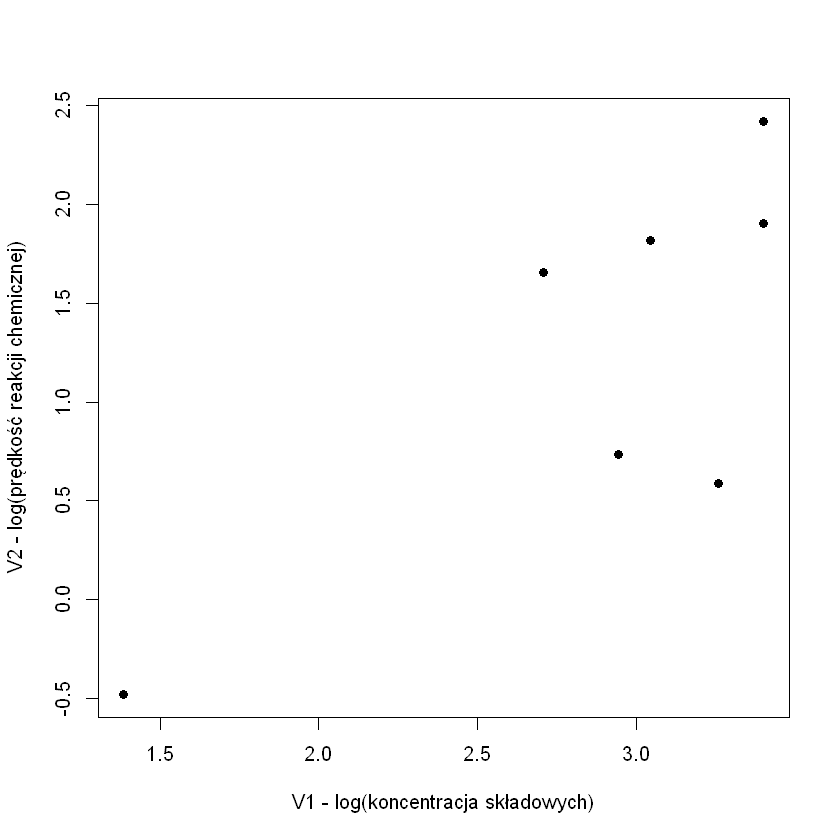

In [42]:
all_log <- plot(log(react$V1), log(react$V2), ylab = "V2 - log(prędkość reakcji chemicznej)", xlab = "V1 - log(koncentracja składowych)", pch = 19)

all_log

# zlogarytmowanie zmiennej 'prędkość' robi nam zależność liniową

iii) Dopasuj model wielomianowy stosując wielomian stopnia 2 dla zmiennej Koncentracja, tzn model
Predkosc = β0 + β1 ∗ Koncentracja + β2 ∗ (Koncentracja)
2

In [43]:
model2 <- lm(V2 ~ V1 + I(V1^2), data = react)
summary(model2)


Call:
lm(formula = V2 ~ V1 + I(V1^2), data = react)

Residuals:
      1       2       3       4       5       6       7 
 2.4286 -1.0292  3.5242 -0.6036 -4.3247  1.7441 -1.7393 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.05881    5.13655   0.206    0.847
V1           0.01278    0.62297   0.021    0.985
I(V1^2)      0.00700    0.01711   0.409    0.703

Residual standard error: 3.336 on 4 degrees of freedom
Multiple R-squared:  0.4529,	Adjusted R-squared:  0.1794 
F-statistic: 1.656 on 2 and 4 DF,  p-value: 0.2993


iv) Przedstaw dopasowaną krzywą na wykresie wraz z danymi. Podsumuj wyniki dopasowanego modelu. Jaki jest współczynnik dopasowania
tego modelu? Czy jest to model właściwy do opisu danych?


Call:
lm(formula = V2 ~ V1 + I(V1^2), data = react)

Residuals:
      1       2       3       4       5       6       7 
 2.4286 -1.0292  3.5242 -0.6036 -4.3247  1.7441 -1.7393 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.05881    5.13655   0.206    0.847
V1           0.01278    0.62297   0.021    0.985
I(V1^2)      0.00700    0.01711   0.409    0.703

Residual standard error: 3.336 on 4 degrees of freedom
Multiple R-squared:  0.4529,	Adjusted R-squared:  0.1794 
F-statistic: 1.656 on 2 and 4 DF,  p-value: 0.2993


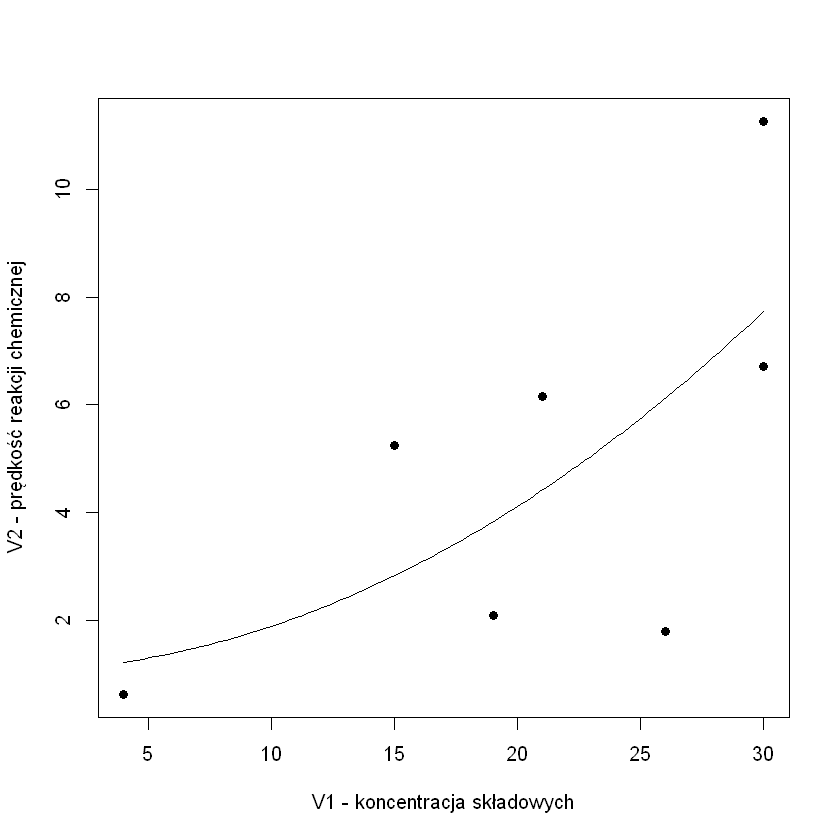

In [48]:
plot(react$V1, react$V2, ylab = "V2 - prędkość reakcji chemicznej", xlab = "V1 - koncentracja składowych", pch = 19)

curve(1.05881 + 0.01278*x + 0.00700*x^2, add = T)

summary(model2)

# współczynnik dopasowania Adjusted R2 wynosi 0.18
# to jest bardzo mało, model nie jest właściwy do danych

 Dopasuj model wielomianowy stosując wielomian stopnia 6 dla zmiennej ( Koncentracja), tzn model
Predkosc = β0+β1∗Koncentracja+β2∗(Koncentracja)
2+β3∗(Koncentracja)
3
+β4 ∗ (Koncentracja)
4 + β5 ∗ (Koncentracja)
5 + β6 ∗ (Koncentracja)
6

In [50]:
model6 <- lm(V2 ~ V1 + I(V1^2) + I(V1^3) + I(V1^4) + I(V1^5) + I(V1^6), data = react)
summary(model6)


Call:
lm(formula = V2 ~ V1 + I(V1^2) + I(V1^3) + I(V1^4) + I(V1^5) + 
    I(V1^6), data = react)

Residuals:
         1          2          3          4          5          6          7 
 5.779e-13 -2.277e+00  2.277e+00 -1.624e-14 -6.820e-13  2.620e-12 -2.644e-12 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -5.207e+02  4.773e+02  -1.091    0.472
V1           2.285e+02  2.090e+02   1.093    0.472
I(V1^2)     -3.133e+01  2.862e+01  -1.095    0.471
I(V1^3)      1.905e+00  1.730e+00   1.101    0.469
I(V1^4)     -5.359e-02  4.831e-02  -1.109    0.467
I(V1^5)      5.701e-04  5.091e-04   1.120    0.464
I(V1^6)             NA         NA      NA       NA

Residual standard error: 3.22 on 1 degrees of freedom
Multiple R-squared:  0.8726,	Adjusted R-squared:  0.2355 
F-statistic:  1.37 on 5 and 1 DF,  p-value: 0.5681


vi) Przedstaw dopasowaną krzywą na wykresie wraz z danymi. Podsumuj wyniki dopasowanego modelu. Jaki jest współczynnik dopasowania
tego modelu? Czy jest to model właściwy do opisu danych? Czy jest on dobry dla przewidywania wartości zmiennej Predkosc dla nowych obserwacji?


Call:
lm(formula = V2 ~ V1 + I(V1^2) + I(V1^3) + I(V1^4) + I(V1^5) + 
    I(V1^6), data = react)

Residuals:
         1          2          3          4          5          6          7 
 5.779e-13 -2.277e+00  2.277e+00 -1.624e-14 -6.820e-13  2.620e-12 -2.644e-12 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -5.207e+02  4.773e+02  -1.091    0.472
V1           2.285e+02  2.090e+02   1.093    0.472
I(V1^2)     -3.133e+01  2.862e+01  -1.095    0.471
I(V1^3)      1.905e+00  1.730e+00   1.101    0.469
I(V1^4)     -5.359e-02  4.831e-02  -1.109    0.467
I(V1^5)      5.701e-04  5.091e-04   1.120    0.464
I(V1^6)             NA         NA      NA       NA

Residual standard error: 3.22 on 1 degrees of freedom
Multiple R-squared:  0.8726,	Adjusted R-squared:  0.2355 
F-statistic:  1.37 on 5 and 1 DF,  p-value: 0.5681


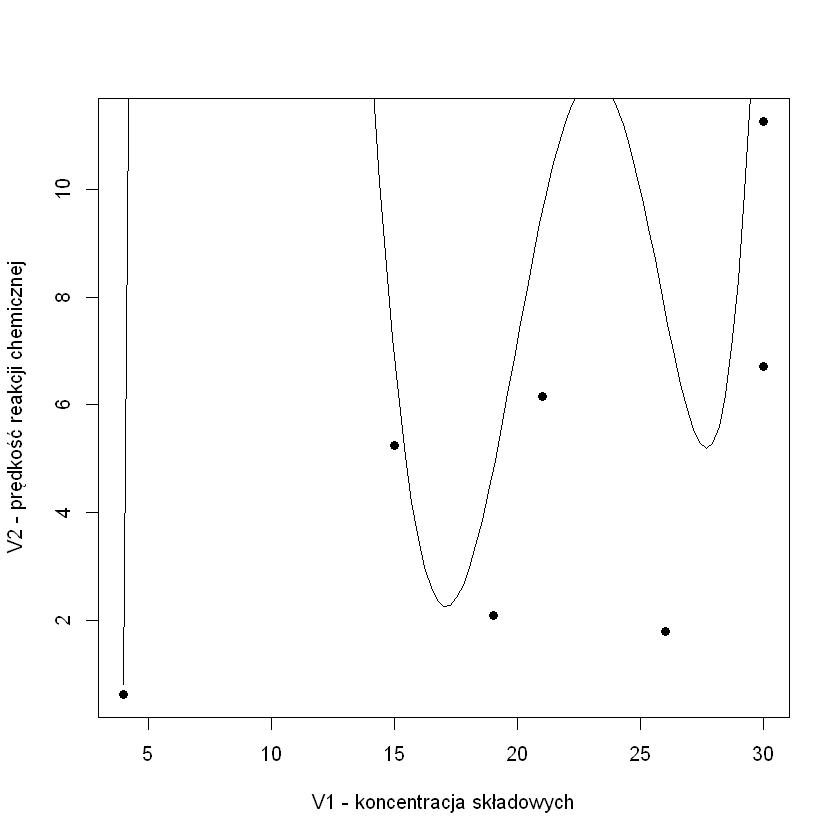

In [52]:
plot(react$V1, react$V2, ylab = "V2 - prędkość reakcji chemicznej", xlab = "V1 - koncentracja składowych", pch = 19)

curve(-5.207e+02 + 2.285e+02*x + -3.133e+01*x^2 + 1.905e+00*x^3 + -5.359e-02*x^4 + 5.701e-04*x^5, add = T)

summary(model6)


# dodanie kolejnych wykładników poprawiła Adjusted R2
# jednak jest on nadal bardzo niski
# nie jest to dobry model do tych danych